Cross-Validation R^2 Scores for Adjusted net enrollment rate, primary Disparity: [-0.05408868  0.59271431  0.56064347  0.52110891  0.73625008]
Average Cross-Validation R^2 Score for Adjusted net enrollment rate, primary Disparity: 0.4713256171032172

Model for Adjusted net enrollment rate, primary Disparity:
  Mean Squared Error: 29.89635556061021
  R-squared: 0.16815911436887065



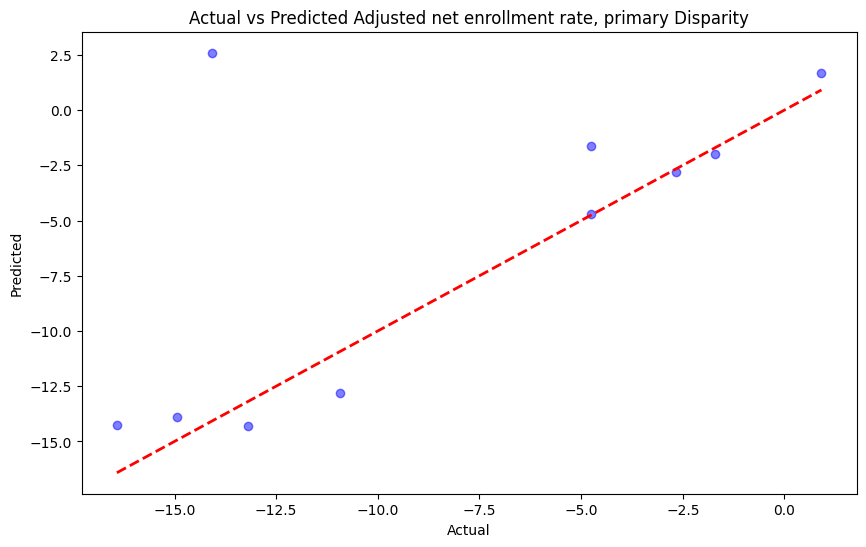

Cross-Validation R^2 Scores for School enrollment, preprimary Disparity: [0.80824004 0.6537763  0.24873796 0.48273746 0.30895011]
Average Cross-Validation R^2 Score for School enrollment, preprimary Disparity: 0.5004883702965192

Model for School enrollment, preprimary Disparity:
  Mean Squared Error: 116.13152938556682
  R-squared: -0.6634935107875382



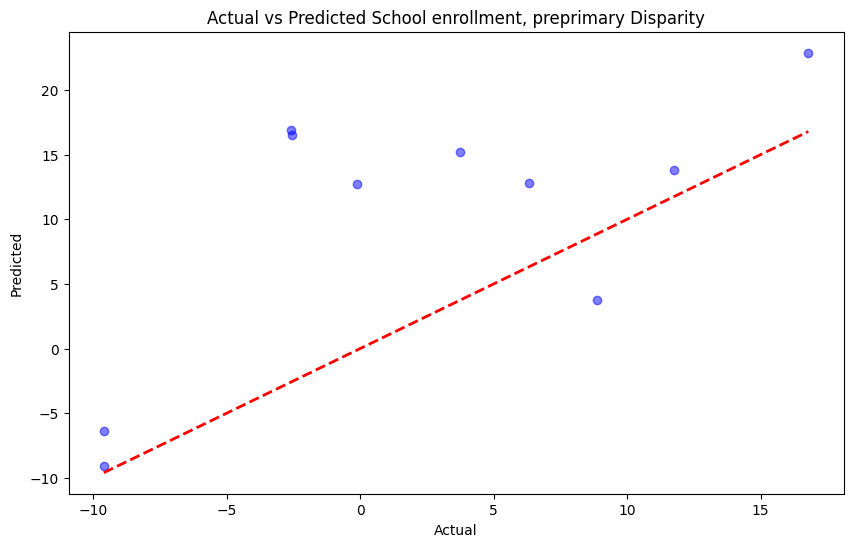

Cross-Validation R^2 Scores for School enrollment, primary (gross) Disparity: [0.67037421 0.71002457 0.55197864 0.53627266 0.59395818]
Average Cross-Validation R^2 Score for School enrollment, primary (gross) Disparity: 0.6125216519181877

Model for School enrollment, primary (gross) Disparity:
  Mean Squared Error: 21.529339441756765
  R-squared: 0.814806807391582



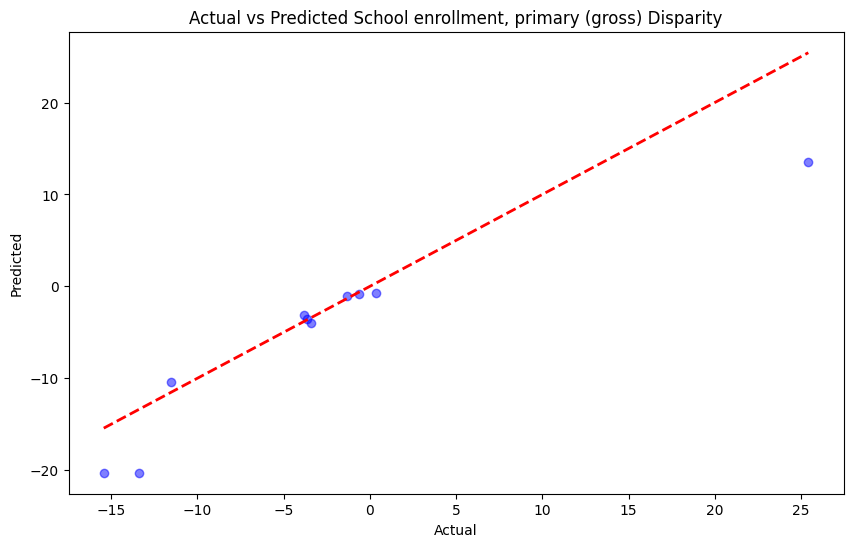

Cross-Validation R^2 Scores for School enrollment, primary (net) Disparity: [0.58036013 0.90639186 0.67172227 0.54130595 0.66909164]
Average Cross-Validation R^2 Score for School enrollment, primary (net) Disparity: 0.6737743699746275

Model for School enrollment, primary (net) Disparity:
  Mean Squared Error: 19.66263674449838
  R-squared: 0.7641393938312748



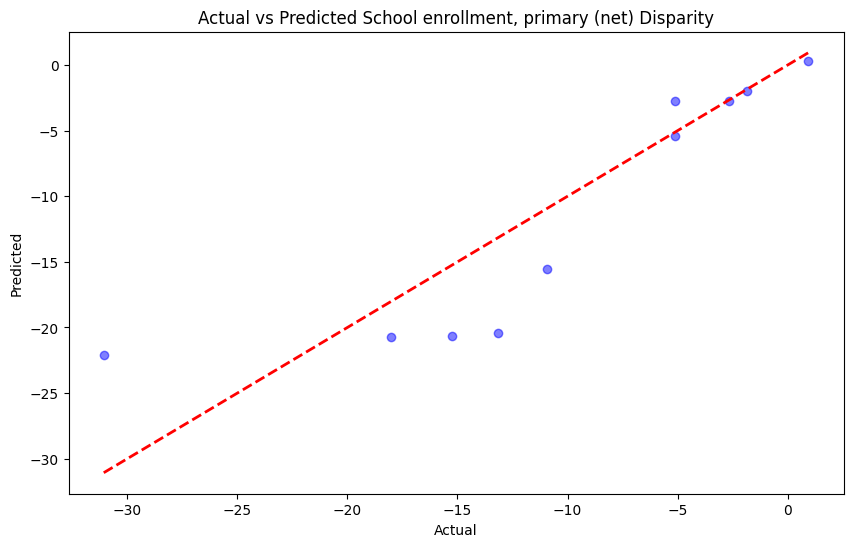

Cross-Validation R^2 Scores for School enrollment, secondary (gross) Disparity: [0.29653746 0.72470739 0.44543742 0.8123658  0.73632556]
Average Cross-Validation R^2 Score for School enrollment, secondary (gross) Disparity: 0.6030747260729538

Model for School enrollment, secondary (gross) Disparity:
  Mean Squared Error: 31.391013883183945
  R-squared: 0.9403922237738171



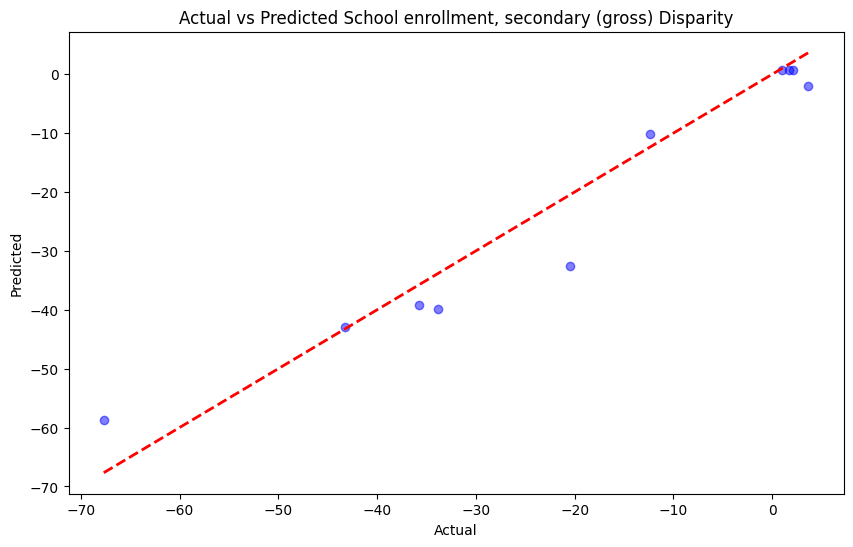

Cross-Validation R^2 Scores for School enrollment, secondary (net) Disparity: [0.92401007 0.9420998  0.89151588 0.73236788 0.75755676]
Average Cross-Validation R^2 Score for School enrollment, secondary (net) Disparity: 0.8495100762898957

Model for School enrollment, secondary (net) Disparity:
  Mean Squared Error: 9.852543390495835
  R-squared: 0.9674443043708326



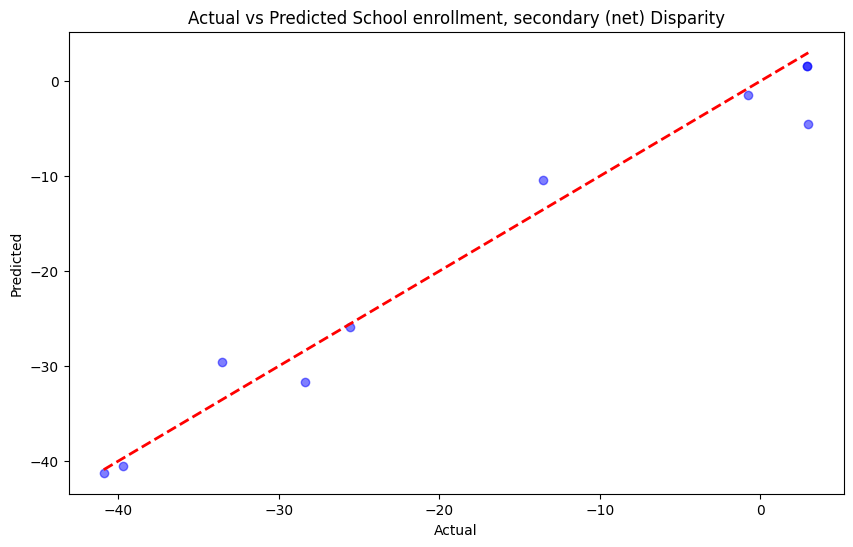

Cross-Validation R^2 Scores for School enrollment, tertiary Disparity: [0.8604405  0.89069973 0.59008413 0.90260608 0.33441002]
Average Cross-Validation R^2 Score for School enrollment, tertiary Disparity: 0.7156480938372842

Model for School enrollment, tertiary Disparity:
  Mean Squared Error: 234.51425214421602
  R-squared: 0.778980165124068



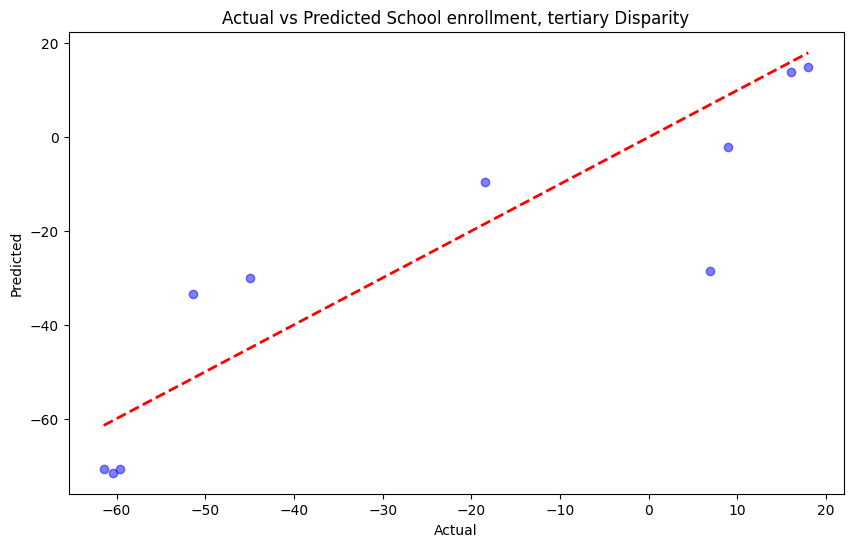

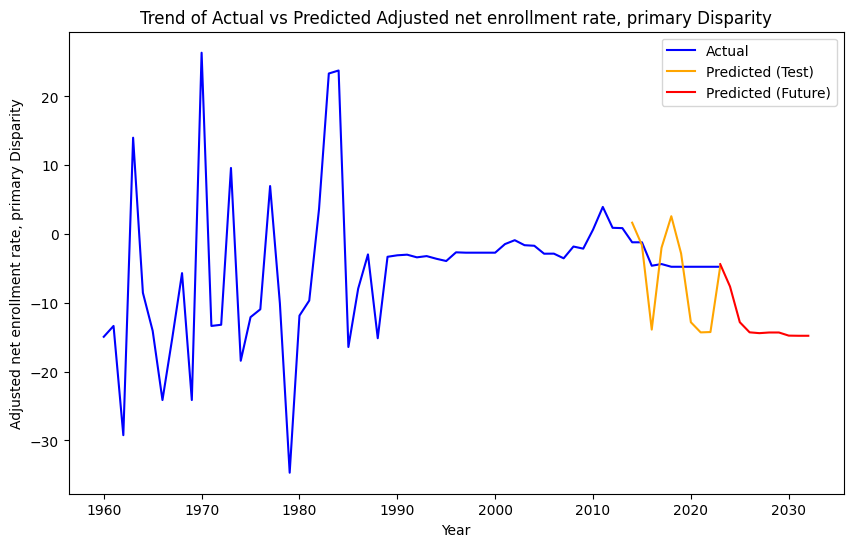

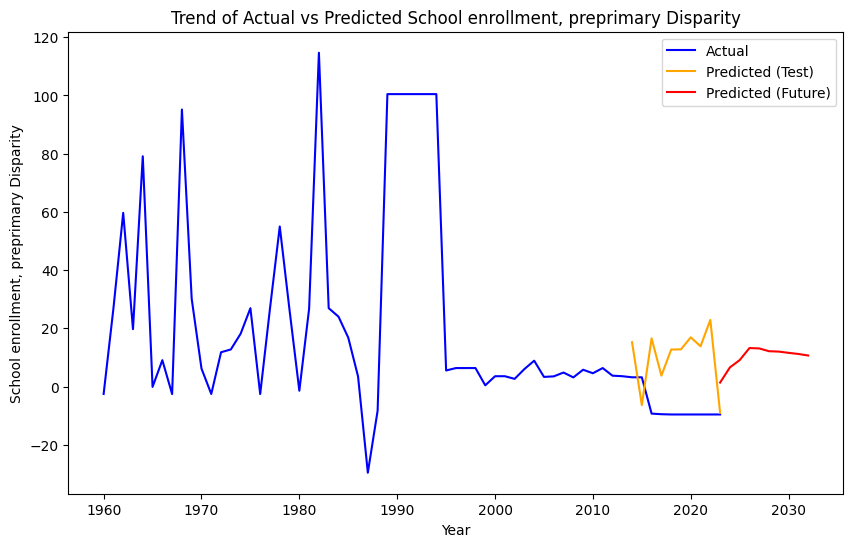

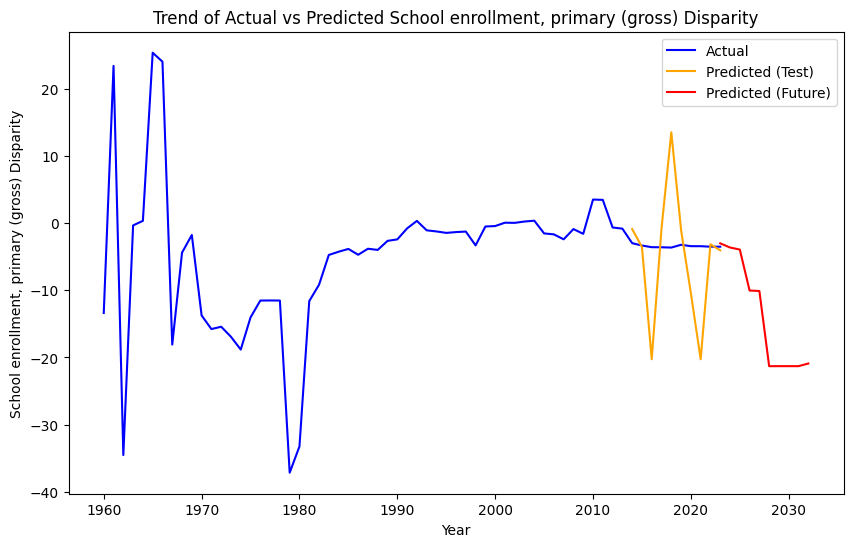

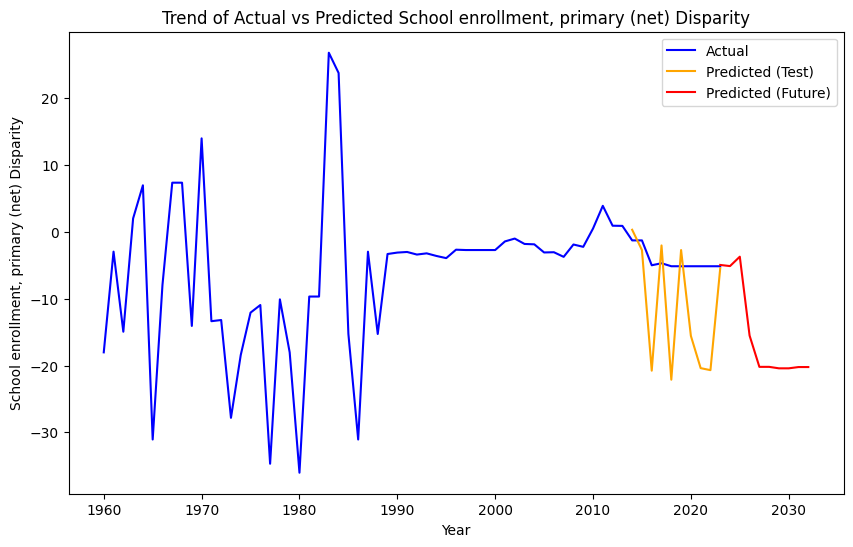

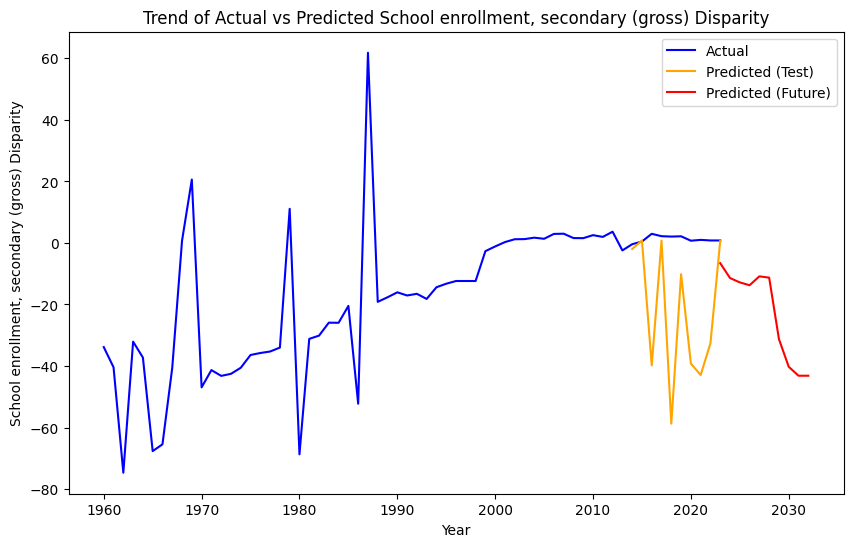

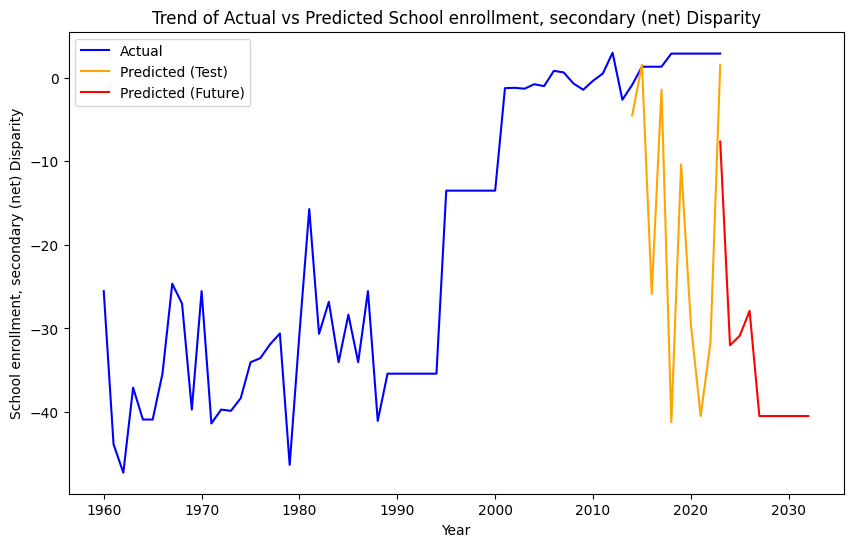

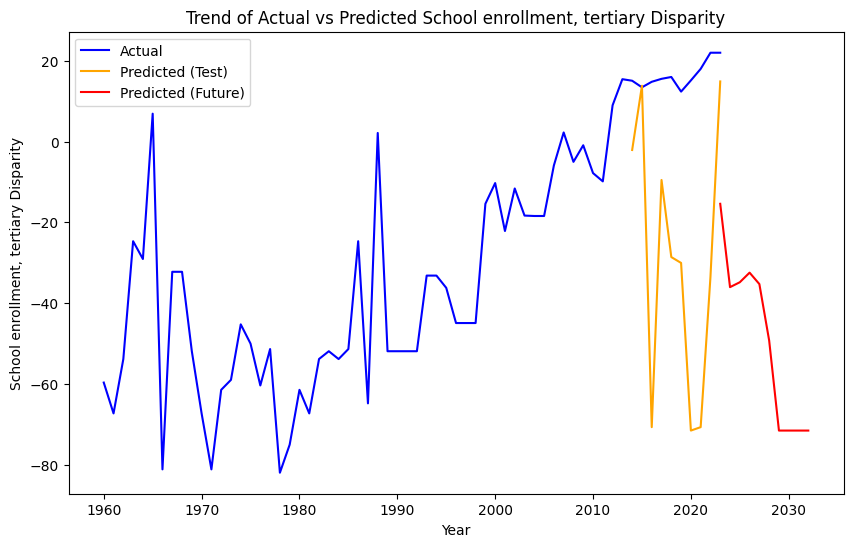

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the cleaned dataset with disparity index
file_path_disparity = 'Cleaned_Gender_IDN_with_Disparity.csv'
data_disparity = pd.read_csv(file_path_disparity)

# Load the original normalized dataset
file_path_original = 'Imputed_Indicators_2.csv'
data_original = pd.read_csv(file_path_original)

# Define features (X) based on columns in the original dataset
features = [
    'Adjusted net enrollment rate, primary, female (% of primary school age children)',
    'Adjusted net enrollment rate, primary, male (% of primary school age children)',
    'School enrollment, preprimary, female (% gross)',
    'School enrollment, preprimary, male (% gross)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, female (% net)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, primary, male (% net)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, female (% net)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, secondary, male (% net)',
    'School enrollment, tertiary, female (% gross)',
    'School enrollment, tertiary, male (% gross)'
]

# Define targets (disparity indices) based on columns in the disparity dataset
targets = [
    'Adjusted net enrollment rate, primary Disparity',
    'School enrollment, preprimary Disparity',
    'School enrollment, primary (gross) Disparity',
    'School enrollment, primary (net) Disparity',
    'School enrollment, secondary (gross) Disparity',
    'School enrollment, secondary (net) Disparity',
    'School enrollment, tertiary Disparity'
]

# Impute missing values in the original dataset
imputer = SimpleImputer(strategy='mean')
data_original_imputed = pd.DataFrame(imputer.fit_transform(data_original), columns=data_original.columns)

# We will create a Random Forest model for each target (disparity index)
models = {}
predictions = {}
for target in targets:
    # Prepare features and target
    X = data_original_imputed[features]
    y = data_disparity[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Create a pipeline with standard scaler and random forest regressor
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=10, n_estimators=100))
    ])

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f'Cross-Validation R^2 Scores for {target}: {cv_scores}')
    print(f'Average Cross-Validation R^2 Score for {target}: {np.mean(cv_scores)}\n')

    # Train the model
    pipeline.fit(X_train, y_train)
    models[target] = pipeline

    # Make predictions
    y_pred = pipeline.predict(X_test)
    predictions[target] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model for {target}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

# Predicting future disparities using rolling window approach

# Generate future years
future_years = np.arange(2023, 2033)

# Make predictions for future years
future_predictions = {}
for target in targets:
    model = models[target]
    X_future = data_original_imputed[features].iloc[-1].copy().to_frame().T
    future_pred = []

    for year in future_years:
        # Predict the disparity for the next year
        pred = model.predict(X_future)[0]
        future_pred.append(pred)

        # Update the features for the next prediction using the predicted disparity value
        # Assuming we have some correlation or update rule for the features based on the predicted disparity
        for feature in X_future.columns:
            X_future[feature] = X_future[feature].values[0] * (1 + pred / 100)  # Example update rule

    future_predictions[target] = future_pred

# Visualize the trend of predicted vs actual disparity index over time
for target in targets:
    plt.figure(figsize=(10, 6))
    plt.plot(data_disparity['Year'], data_disparity[target], label='Actual', color='blue')
    plt.plot(data_disparity['Year'][len(data_disparity) - len(y_test):], predictions[target], label='Predicted (Test)', color='orange')
    plt.plot(future_years, future_predictions[target], label='Predicted (Future)', color='red')
    plt.xlabel('Year')
    plt.ylabel(target)
    plt.title(f'Trend of Actual vs Predicted {target}')
    plt.legend()
    plt.show()
